In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
article_df = pd.read_csv('articles.csv')
article_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
article_df['article_id'].nunique(), article_df.shape[0]

(105542, 105542)

In [4]:
article_df['prod_name'].nunique()

45875

In [5]:
customer_df = pd.read_csv('customers 2.csv')
customer_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [6]:
transactions = pd.read_csv('transactions_train.csv')

In [7]:
print(transactions.shape)

(31788324, 5)


In [8]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [9]:
transactions.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

In [10]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions['t_dat'].min(), transactions['t_dat'].max()

(Timestamp('2018-09-20 00:00:00'), Timestamp('2020-09-22 00:00:00'))

In [11]:
hm = transactions.merge(customer_df, on="customer_id", how="left")

In [12]:
hm = hm.merge(article_df, on="article_id", how="left")

In [13]:
hm.head()

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,NaN,NaN,ACTIVE,NONE,24.0,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,NaN,NaN,ACTIVE,NONE,24.0,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,ACTIVE,Regularly,32.0,...,Tops Knitwear DS,D,Divided,2,Divided,58,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,...,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,...,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...


In [14]:
hm.shape

(31788324, 35)

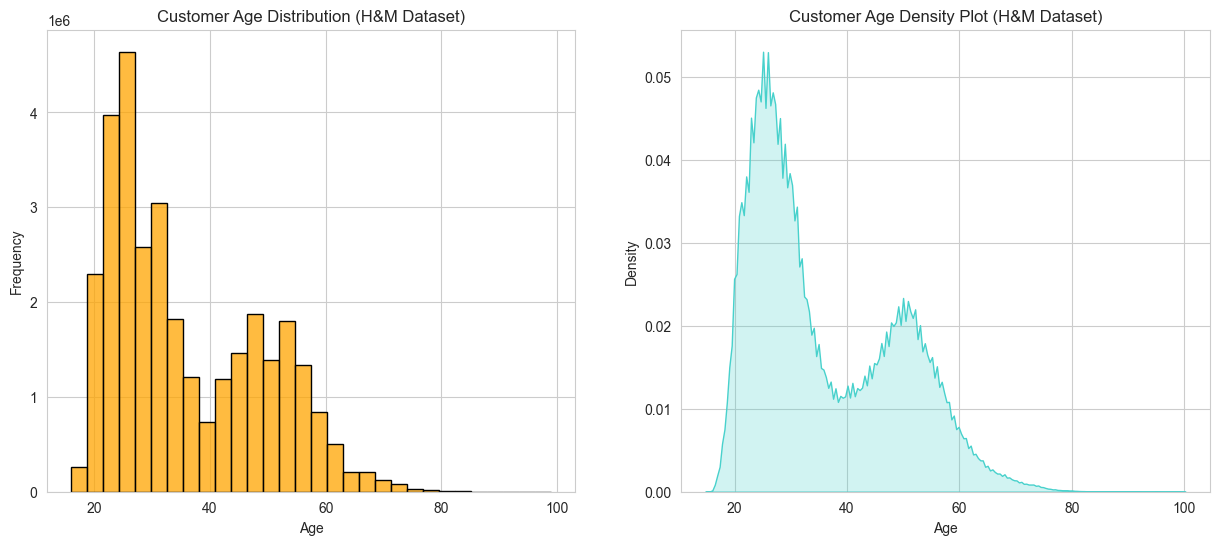

In [17]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
sns.histplot(hm['age'], bins=30, color='orange', edgecolor='black')
plt.title('Customer Age Distribution (H&M Dataset)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.kdeplot(hm['age'], color='mediumturquoise', shade=True)
plt.title('Customer Age Density Plot (H&M Dataset)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

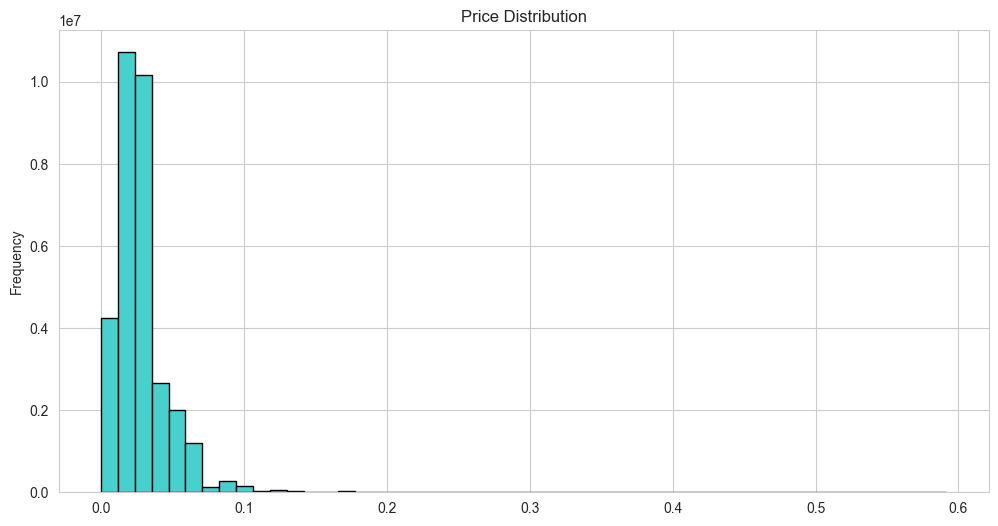

In [18]:
hm['price'].plot(kind='hist', bins=50, figsize=(12,6),color = 'mediumturquoise', edgecolor='black')
plt.title("Price Distribution")
plt.show()

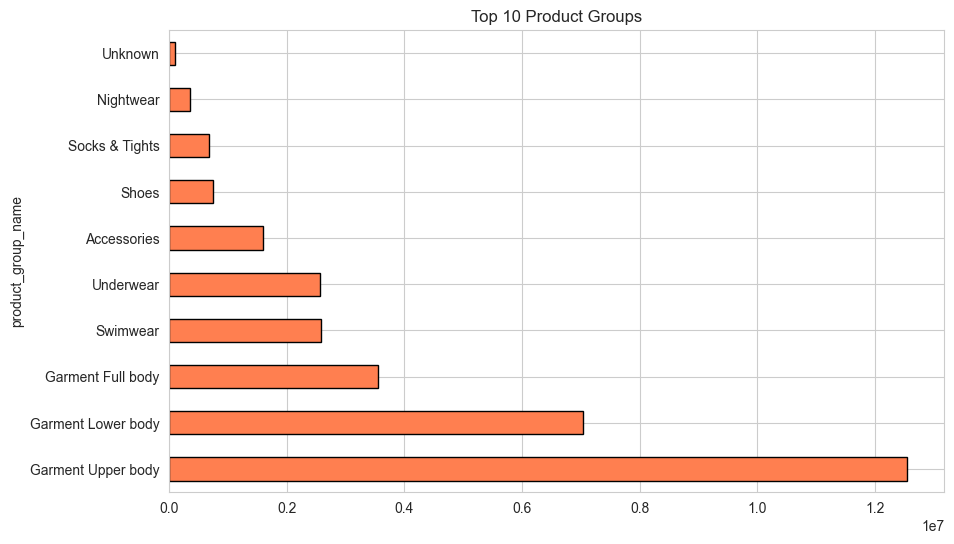

In [19]:
hm['product_group_name'].value_counts().head(10).plot(kind='barh', figsize=(10,6), color='coral', edgecolor='black')
plt.title("Top 10 Product Groups")
plt.show()

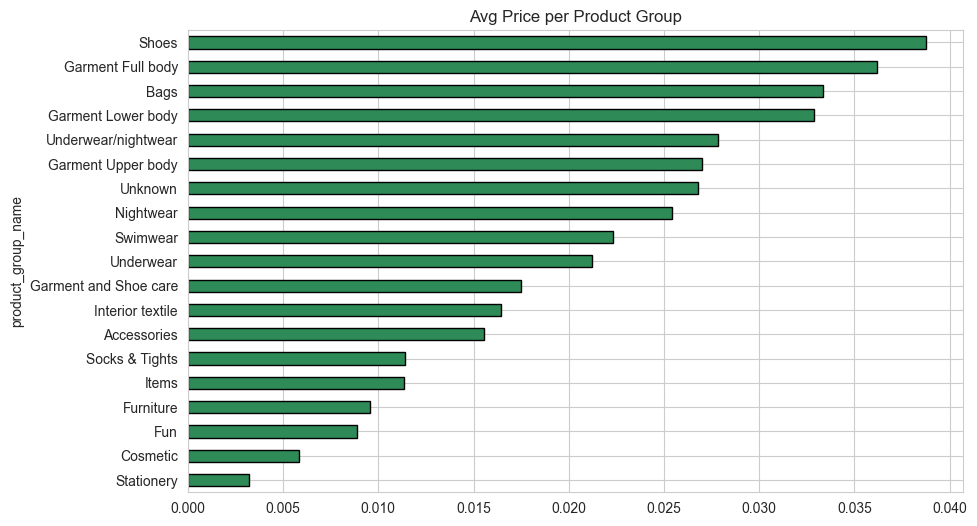

In [20]:
hm.groupby('product_group_name')['price'].mean().sort_values().plot(kind='barh', figsize=(10,6), color='seagreen', edgecolor='black')
plt.title("Avg Price per Product Group")
plt.show()

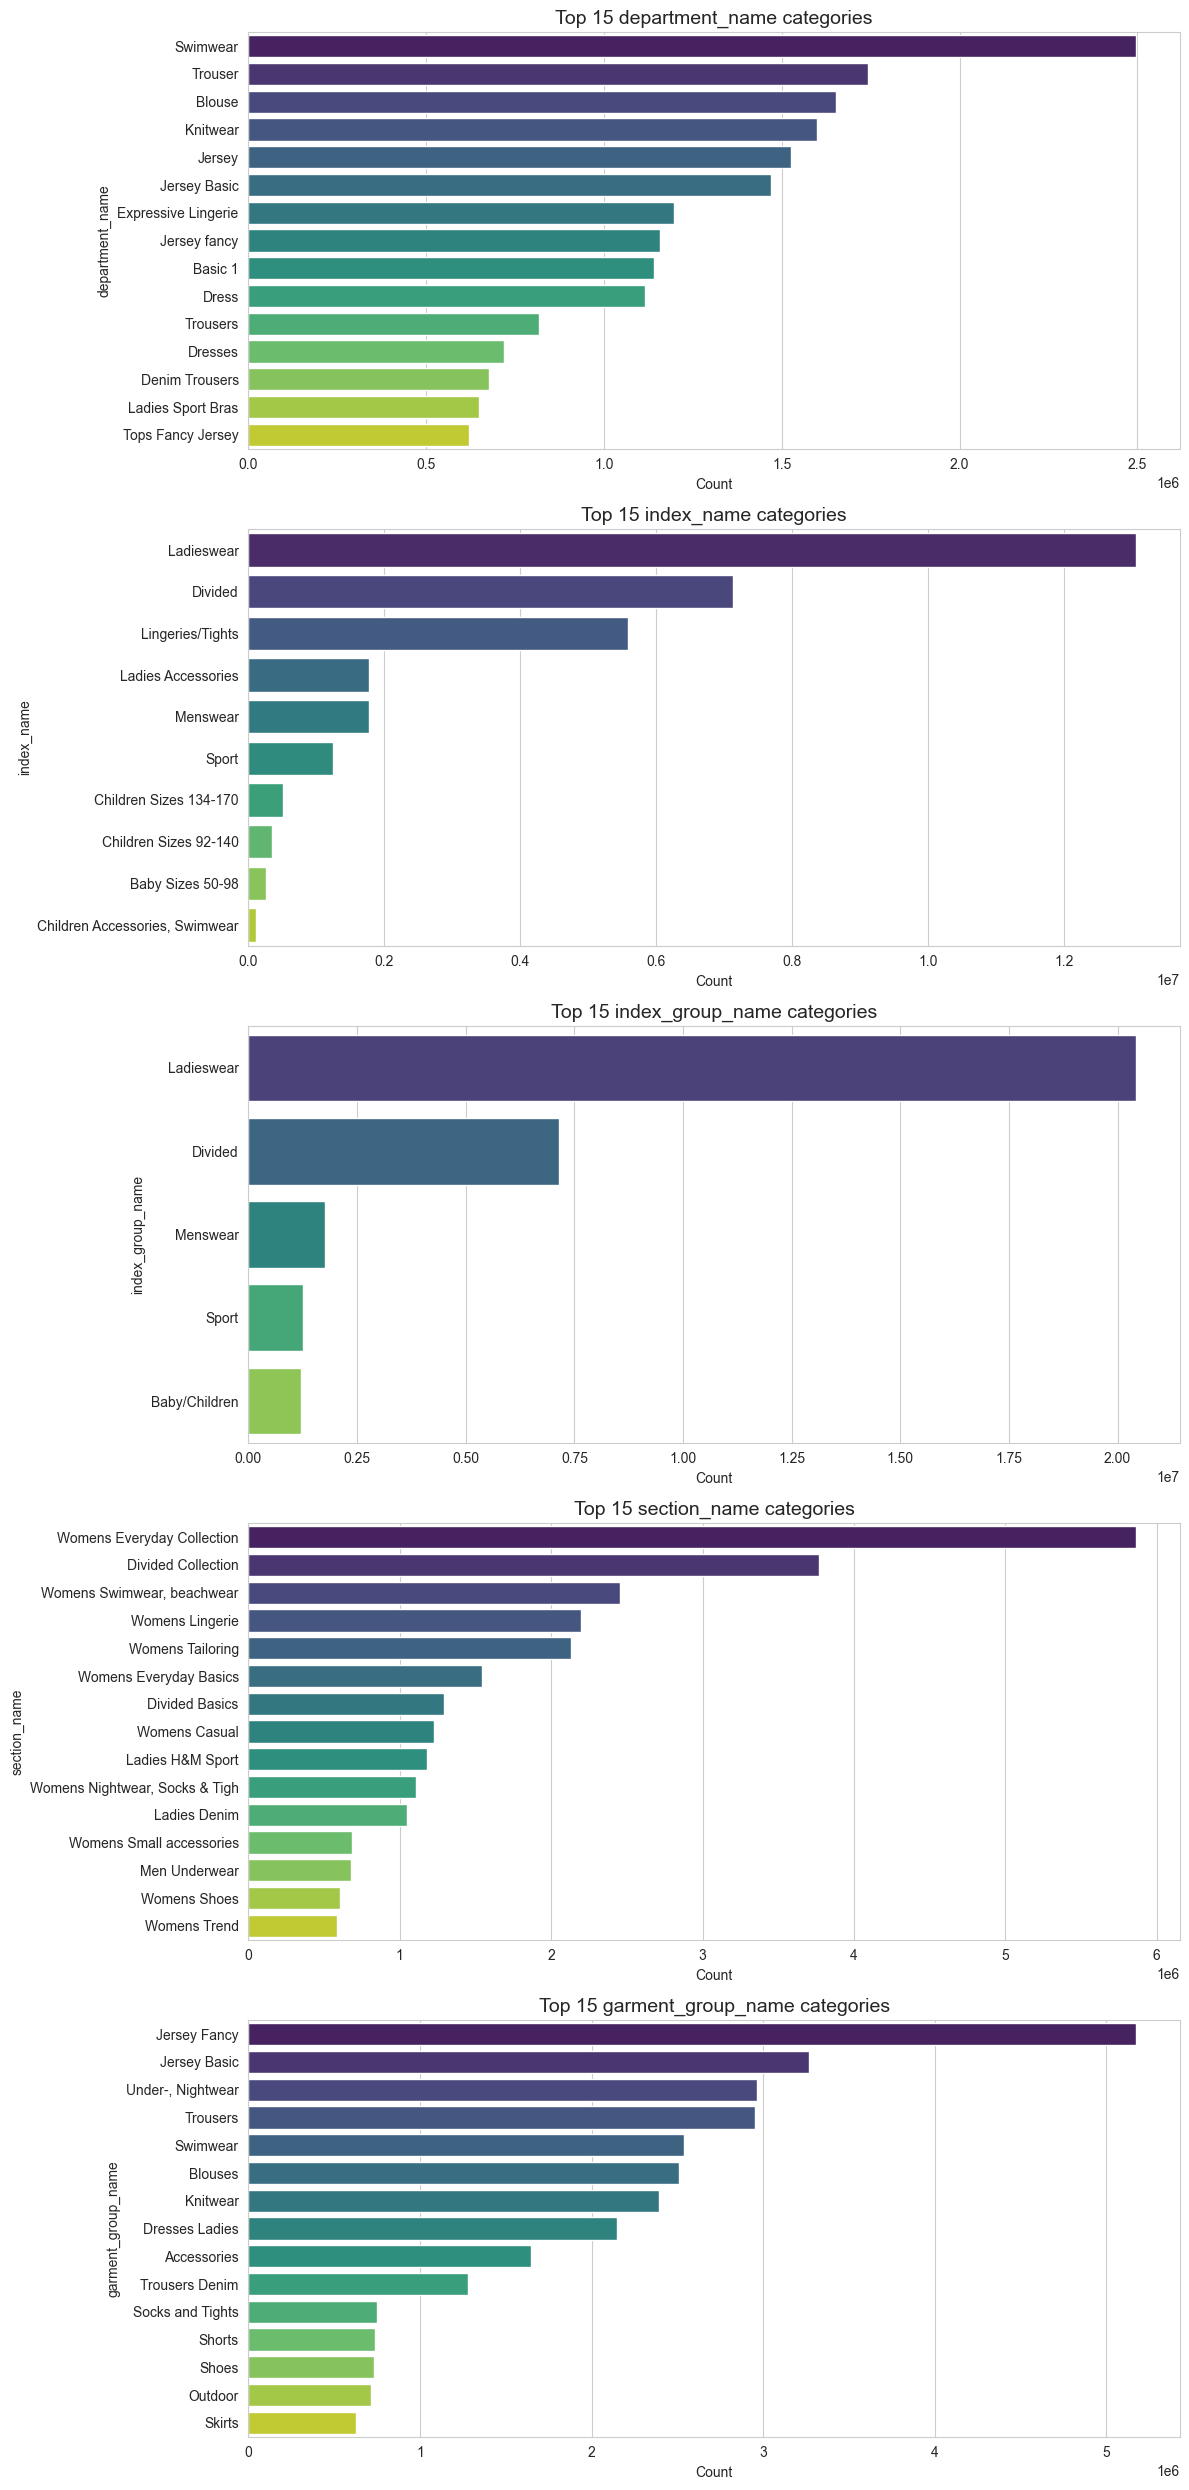

In [21]:
# List of categorical features to explore
features = ["department_name", "index_name", "index_group_name", "section_name", "garment_group_name"]

# Plot top categories for each feature
fig, axes = plt.subplots(len(features), 1, figsize=(12, 25))

for i, col in enumerate(features):
    top_counts = hm[col].value_counts().head(15)   # top 15 categories
    sns.barplot(x=top_counts.values, y=top_counts.index, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Top 15 {col} categories", fontsize=14)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

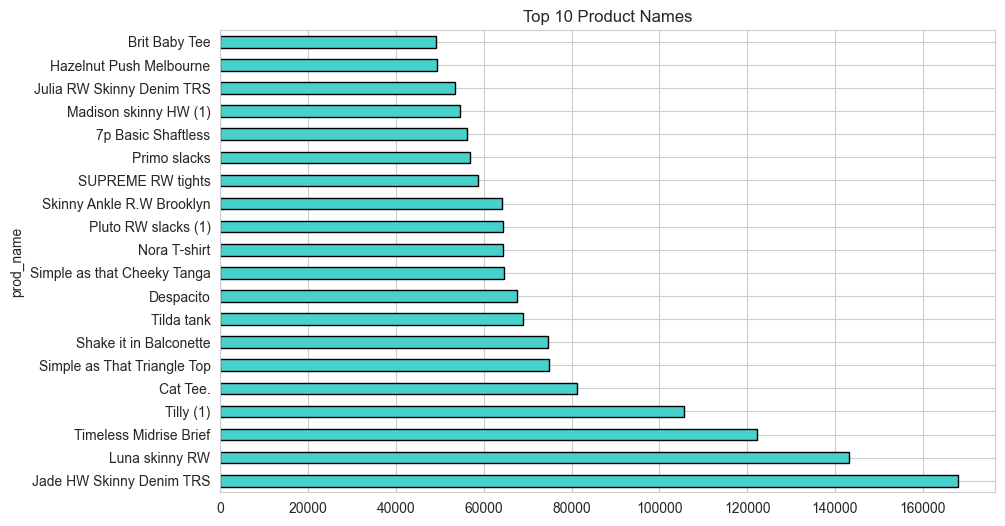

In [22]:
hm['prod_name'].value_counts().head(20).plot(kind='barh', figsize=(10,6), color= 'mediumturquoise', edgecolor='black')
plt.title("Top 10 Product Names")
plt.show()

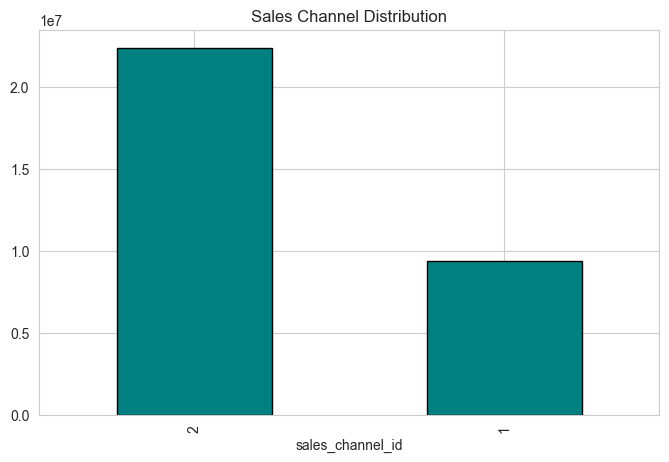

In [23]:
# Sales channel split
hm['sales_channel_id'].value_counts().plot(kind='bar', figsize=(8,5), color='teal', edgecolor='black')
plt.title("Sales Channel Distribution")
plt.show()

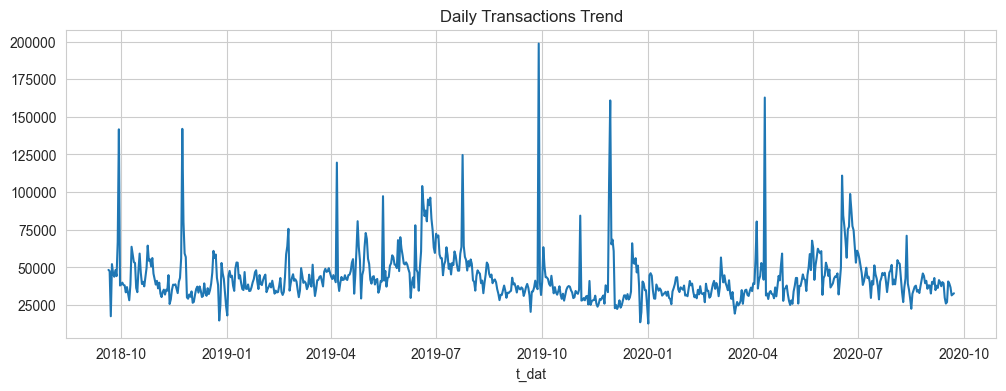

In [24]:
hm.groupby(hm['t_dat'].dt.date).size().plot(figsize=(12,4))
plt.title("Daily Transactions Trend")
plt.show()

In [25]:
hm['month'] = hm['t_dat'].dt.to_period('M').dt.to_timestamp()

In [26]:
monthly_dept = hm.groupby(['month','department_name']).size().reset_index(name='count')
top_depts = monthly_dept.groupby('department_name')['count'].sum().nlargest(5).index

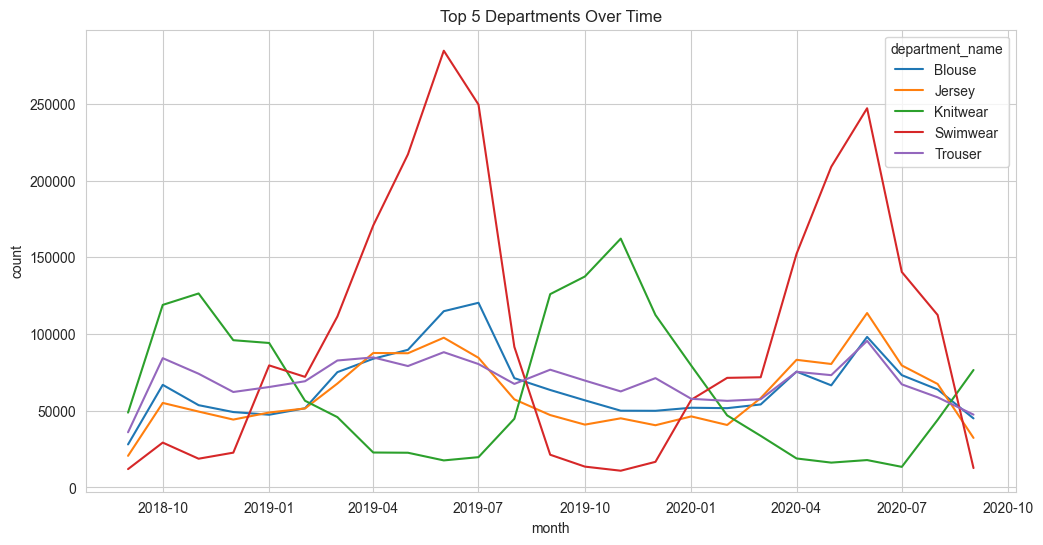

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_dept[monthly_dept['department_name'].isin(top_depts)], 
             x='month', y='count', hue='department_name')
plt.title("Top 5 Departments Over Time")
plt.show()

In [28]:
hm['age_group'] = pd.cut(hm['age'], bins=[0,20,30,40,50,60,100], 
                         labels=['<20','20s','30s','40s','50s','60+'])

In [29]:
age_section = hm.groupby(['age_group','section_name']).size().reset_index(name='count')
top_sections = age_section.groupby('section_name')['count'].sum().nlargest(5).index

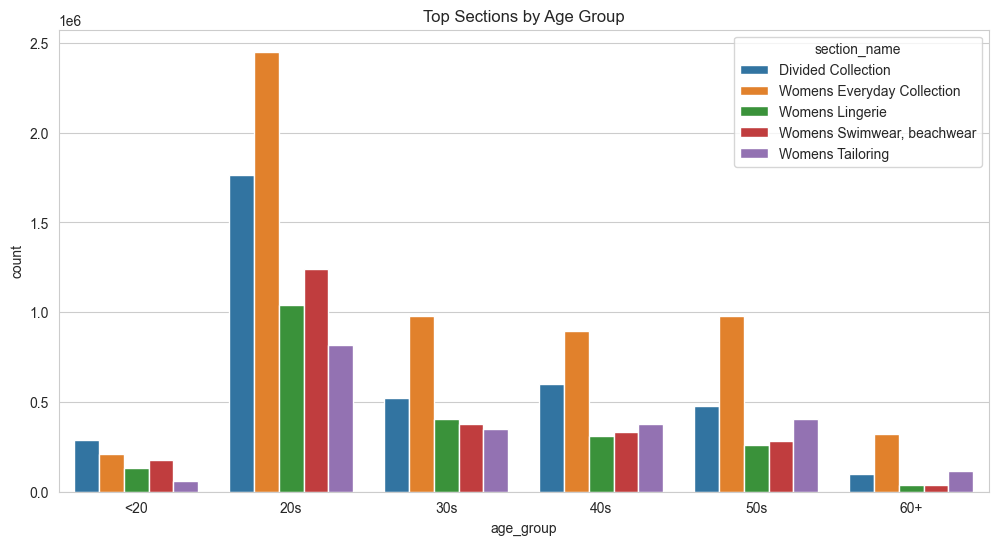

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data=age_section[age_section['section_name'].isin(top_sections)],
            x='age_group', y='count', hue='section_name')
plt.title("Top Sections by Age Group")
plt.show()

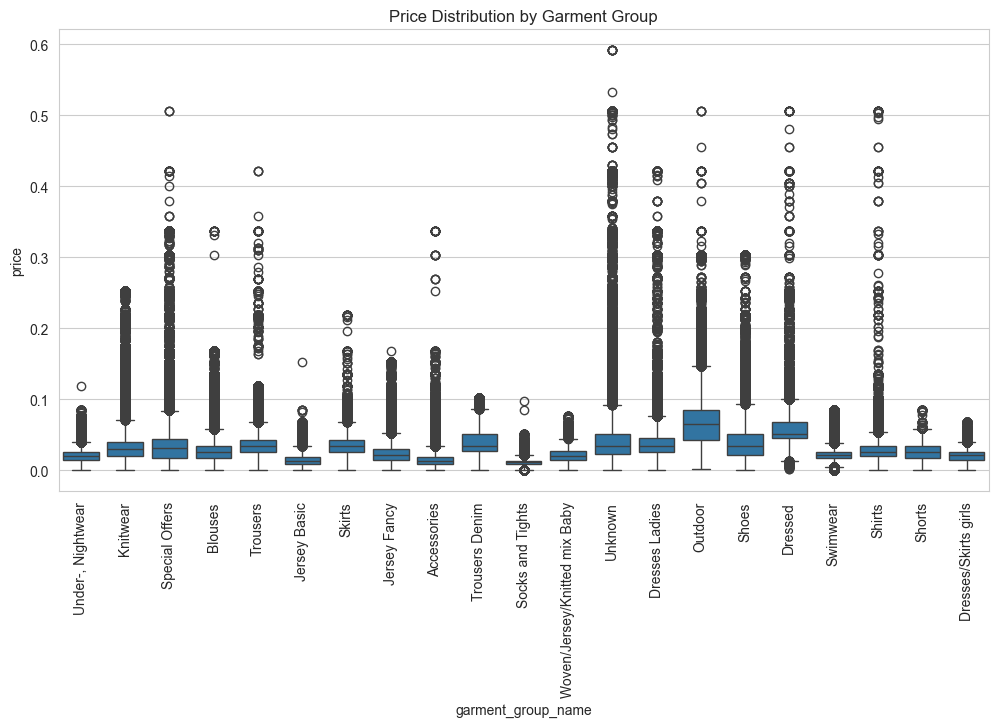

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(data=hm, x='garment_group_name', y='price')
plt.xticks(rotation=90)
plt.title("Price Distribution by Garment Group")
plt.show()

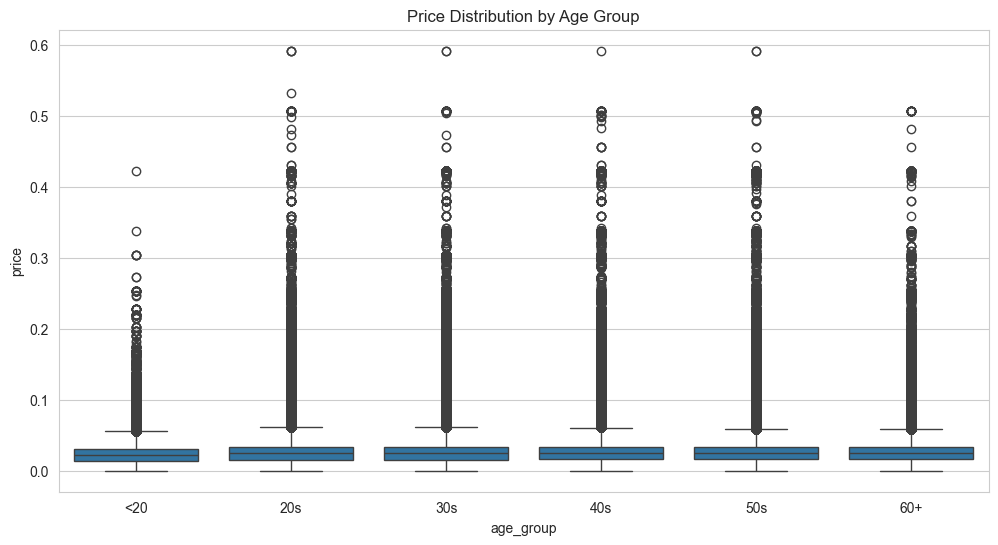

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=hm, x='age_group', y='price')
plt.title("Price Distribution by Age Group")
plt.show()

In [33]:
hm['weekday'] = hm['t_dat'].dt.day_name()

# Count transactions per weekday
weekday_counts = hm['weekday'].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

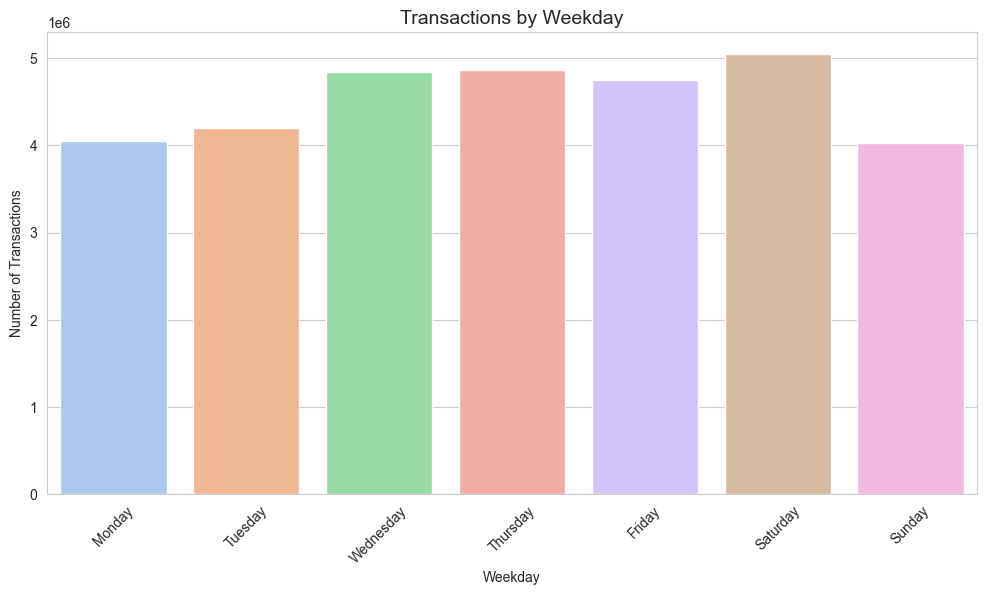

In [34]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="pastel")
plt.title("Transactions by Weekday", fontsize=14)
plt.ylabel("Number of Transactions")
plt.xlabel("Weekday")
plt.xticks(rotation=45)
plt.show()

In [35]:
cf_hm = hm[['customer_id', 'article_id']].copy()

In [36]:
cf_hm = cf_hm.groupby(['customer_id','article_id']).size().reset_index(name='purchases')

In [37]:
cf_hm.head()

,customer_id,article_id,purchases
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006,2
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,607642008,1
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001,1


Text(0.5, 0, 'Number of Purchases')

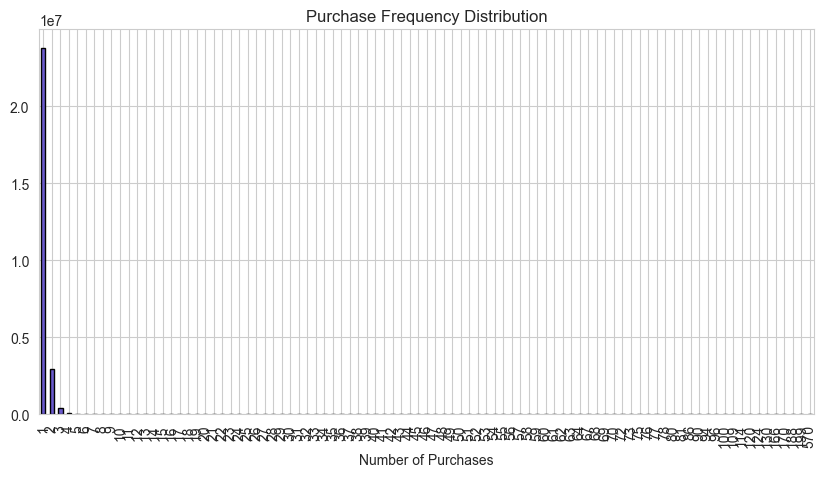

In [38]:
cf_hm['purchases'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), color='slateblue', edgecolor='black')
plt.title("Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")

In [39]:
popular_items = hm['prod_name'].value_counts().head(50)

In [40]:
popular_items.head()

prod_name
Jade HW Skinny Denim TRS    168052
Luna skinny RW              143216
Timeless Midrise Brief      122143
Tilly (1)                   105670
Cat Tee.                     81304
Name: count, dtype: int64

In [41]:
recent_popular = hm[hm['t_dat'] >= "2020-08-01"]['prod_name'].value_counts().head(50)
recent_popular.head()

prod_name
Pluto RW slacks (1)         13559
Jade HW Skinny Denim TRS    13153
Tilly (1)                    9965
Lucy blouse                  9097
Cat Tee.                     8801
Name: count, dtype: int64

In [44]:
# Encode IDs
user_enc = LabelEncoder()
item_enc = LabelEncoder()

cf_hm['user_id'] = user_enc.fit_transform(cf_hm['customer_id'])
cf_hm['item_id'] = item_enc.fit_transform(cf_hm['article_id'])

In [46]:
# Sparse matrix
user_item_matrix = csr_matrix(
    (cf_hm['purchases'], (cf_hm['user_id'], cf_hm['item_id']))
)

In [47]:
print("Matrix shape:", user_item_matrix.shape)   # (n_users, n_prod_names)
print("Non-zero entries:", user_item_matrix.nnz)

Matrix shape: (1362281, 104547)
Non-zero entries: 27306439


In [48]:
# Compute similarity for a small subset (e.g. top 500 items for speed)
subset = user_item_matrix[:, :500] 

In [50]:
item_sim = cosine_similarity(subset.T)

In [51]:
print("Item similarity matrix shape:", item_sim.shape)

Item similarity matrix shape: (500, 500)


In [52]:
# Pick a product to test (e.g. first one in encoder)
test_item = 112
similar_items = item_sim[test_item].argsort()[::-1][1:6]  # top 5 excluding itself

print("Product:", item_enc.inverse_transform([test_item])[0])
print("Similar products:", item_enc.inverse_transform(similar_items))

Product: 176754001
Similar products: [176754003 176754019 220094016 212042043 216961011]
